Sasha Morrison, workshop submission for 1.3

#1. Reflexive and symmetric, but not transitive
{(a,a),(a,b),(b,a),(b,b),(b,c),(c,b),(c,c)}
Real World: Synonyms
#2. Reflexive, but neither symmetric nor transitive
{(a,a),(a,b),(b,b),(c,b),(c,c)}
#3. Symmetric, but neither reflexive nor transitive 
{(a,b),(b,a),(b,c),(c,b)}
#4. Transitive, but neither reflexive nor symmetric  
{(a,b),(b,c),(c,a)}# 1. Math Drills

Give an example of a binary relation on a set which is

1. Reflexive and symmetric, but not transitive  
2. Reflexive, but neither symmetric nor transitive  
3. Symmetric, but neither reflexive nor transitive  
4. Transitive, but neither reflexive nor symmetric  

Recall the definitions from the lectures if you need to!

In [ ]:
#1. Reflexive and symmetric, but not transitive
{(a,a),(a,b),(b,a),(b,b),(b,c),(c,b),(c,c)}
Real World: Synonyms
#2. Reflexive, but neither symmetric nor transitive
{(a,a),(a,b),(b,b),(c,b),(c,c)}
#3. Symmetric, but neither reflexive nor transitive 
{(a,b),(b,a),(b,c),(c,b)}
#4. Transitive, but neither reflexive nor symmetric  
{(a,b),(b,c),(c,a)}

# Exercise 2: A bunch of Math!

## Polynomial

Consider the polynomial

$$
p(x)
= a_0 + a_1 x + a_2 x^2 + \cdots a_n x^n
= \sum_{i=0}^n a_i x^i \tag{1}
$$

Write a function `p` such that `p(x, coeff)` that computes the value in given a point `x` and a list of coefficients `coeff`.

```
p(5, [1, 1]) = 1 + 5 = 6
p(5, [2, 1, 1]) = 2 + 5 + 25 = 32
```

In [1]:
def p(x, coeff):
    n = len(coeff)
    out = 0
    
    for e in range(n):
        out += coeff[e]*(x**e)
        
    return out

p(5, [1, 1]), p(5, [2, 1, 1])

(6, 32)

# Variance

Define a function named `var` that takes a list of numbers and computes the variance. The variance is:

$$variance(x) = \frac{∑_i^N(x_i − average(x))^2}{N-1}$$


Don't cheat and use `numpy.var`! You should only use that function to test that your function is correct

In [2]:
import numpy as np

def var(x):
    out = 0
    
    for e in x:
        out += (e - (sum(x)/len(x)))**2 
    out = out / len(x)
    
    return out
    #note: built such that == np.var()
    #as such: does not divide by N-1 instead div by N or Len(x)

test = [1, 20, 50, 4, 100, -100]
np.var(test) == var(test), var(test), np.var(test)

(True, 3663.25, 3663.25)

# RMSE

Calculate the root mean squared error (RMSE) of a machine learning model's output. The function takes in two lists: one with actual values, one with predictions. The formula for RMSE is:

$$RMSE(y_1, y_2) = \sqrt{\dfrac{1}{N} \sum_{i=1}^N (y_{1i} - y_{2i})^2}$$

```
    rmse([1, 2], [1, 2]) = 0
    rmse([1, 2, 3], [3, 2, 1]) = 1.63
```

You can use 

```
sklearn.metrics.mean_squared_error(y_actual, y_predicted, squared=False)
```

To test your function

In [3]:
import sklearn.metrics

def rmse(act, chk):
    n = 0
    tot = 0
    
    for i in act:
        tot += ((i - chk[n])**2)
        n += 1
        
    return np.sqrt((tot / len(act)))

print(rmse([1, 2], [1, 2]), rmse([1, 2, 3], [3, 2, 1]))
sklearn.metrics.mean_squared_error([1, 2, 3], [3, 2, 1], squared=False) == rmse([1, 2, 3], [3, 2, 1])

0.0 1.632993161855452


True

# Jaccard Similarity

The Jaccard similarity between two sets is the size of intersection divided by the size of union. Write a function that computes it:

$$jaccard(A, B) = \dfrac{|A \cap B|}{|A \cup B|}$$


```
jaccard({'a', 'b', 'c'}, {'a', 'd'}) = 1 / 4
```



In [4]:
def jaccard(a, b):
    return len(a.intersection(b)) / len(a.union(b))

jaccard({'a', 'b', 'c'}, {'a', 'd'})

0.25

# Exercise 3

First, write a function that returns one realization of the following random device

1. Flip an unbiased coin 10 times.  
1. If a head occurs `k` or more times consecutively within this sequence at least once, pay one dollar.  
1. If not, pay nothing.  


Second, write another function that does the same task except that the second rule of the above random device becomes

- If a head occurs `k` or more times within this sequence, pay one dollar.  


Use no import besides `from numpy.random import uniform`.

In [5]:
import numpy as np

def coin1(k):
    seq = 0
    owe = 0
    dbug = []
   
    for i in range(10):
        uniform = np.random.uniform()
        if uniform < 0.5:   
            seq += 1
            dbug.append('h')
        else:
            seq = 0
            dbug.append('t')
            
        if seq == k:
            owe += 1          

    return owe, dbug
coin1(2)

(1, ['t', 't', 't', 'h', 't', 'h', 'h', 'h', 'h', 'h'])

In [6]:
def coin2(k):
    """
    counts instances of heads,
    returns bool for total heads >= k
    """
    tot = 0
    res = []
    
    for i in range(10):
        if np.random.uniform(0, 1) >= 0.5:
            #result is heads
            tot += 1
            res.append('Heads')
            
        #result is tails   
        else:
            res.append('Tails')
    return tot >= k, tot, res
            
            
coin2(4)

(True,
 8,
 ['Heads',
  'Heads',
  'Heads',
  'Heads',
  'Heads',
  'Heads',
  'Tails',
  'Heads',
  'Tails',
  'Heads'])

# Exercise 4: Logistic Map fixed point

The **Logistic Map** is a famous function from Chaos Theory which is defined as:

$$x_{t+1} = r \cdot x_t(1−x_t)$$

with the conditions:

$$x_0 ∈ [0,1], r ∈[0,4]$$

Write a lambda $f = logistic(x, r)$, that's successively applied to itself $n$ times through a second function `logistic_n_times(x0, f, r, n)` with the inital point $X_0$

Make a few runs of this for various values of `x0` and `r`. Answer the following:

- Can you find a fixed point? 
- Yes (0.5, 2)

- At what values of `r` are there fixed points? 
- 1 < r < 3

- Are there any ranges of input for which the function is an attractor?
-  Yes, see ex. 5

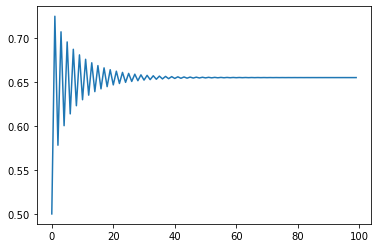

In [7]:
import numpy as np
import matplotlib.pyplot as plt

logistics = lambda x, r : r * x * (1-x) 

def logistic_n_times(x0, r, n):
    x = x0
    outlist = []
    
    for i in range(n):
        outlist.append(x)
        x = logistics(x, r)
        
    return outlist

graph = plt.plot(logistic_n_times(0.5, 2.9, 100))

# Exercise 5 (stretch): Famous Chaos Theory Plot 

There is a famous plot in chaos theory of the logistic map that relates values of the attractors in $x_t$ for values of $r$, detailing where the function tends to "end up" for each value of $r$.

<img src="logistic map.png" style="width: 400px;">

Reproduce this plot using the `matplotlib` package.

**Hint:** Produce samples from the function to fill arrays on the x and y axis!

**Hint:** Take the final 50 values in a series of data points produced by the function!

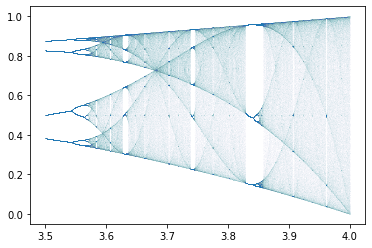

In [8]:
import numpy as np
import matplotlib.pyplot as plt

lenlist = 200 # arbitrary constant used to equalize xdata/ydata
logistics = lambda x, r : r * x * (1-x) 
rvals = np.arange(3.5, 4.00, 0.000125).tolist()
# create a list of r values between (0, 4) in steps of a given increment
# note: currently set to show a detailed map of r = 3.5 to 4

def logmap_n(x0, r, n):
    x = x0
    outlist = []
    
    for i in range(n):
        outlist.append(x)
        x = logistics(x, r)
        
    return outlist

xvals = rvals
yvals = [ logmap_n(0.5, i, 300) for i in xvals ]

ydata = [ y[-lenlist:] for y in yvals ]
xdata = [ [x] * lenlist for x in xvals ] 

plt.scatter(xdata, ydata, alpha=0.01, cmap='viridis', s=.5, marker='.')